<a href="https://colab.research.google.com/github/vaishnasuraj/vaishnasuraj.github.io/blob/master/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation for a Retail Chain



<img src="https://images.unsplash.com/photo-1542838132-92c53300491e" width="100%">


## Project Goal
Segment customers based on their shopping behavior to help the retail client:
- Design targeted marketing strategies
- Improve customer retention
- Increase sales through personalization

## Dataset Description
Link to the dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

Mall_Customers.csv contains:
- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1-100)

## Steps
1. Import libraries and load dataset
2. Data Cleaning & Exploratory Data Analysis (EDA)
3. Feature Scaling
4. K-Means Clustering
5. Visualizing Customer Segments
6. Summary Insights and Recommendations


In [1]:
# Step 1
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For K-Means clustering
from sklearn.cluster import KMeans

# For feature scaling
from sklearn.preprocessing import StandardScaler

# To display plots inline
%matplotlib inline

# Load dataset
from google.colab import files

# Upload the CSV file (Mall_Customers.csv)
uploaded = files.upload()

# Load data into a pandas DataFrame
df = pd.read_csv('Mall_Customers.csv')

# Preview the first 5 rows
df.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dataset shape: (200, 5)

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Summary statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.00000

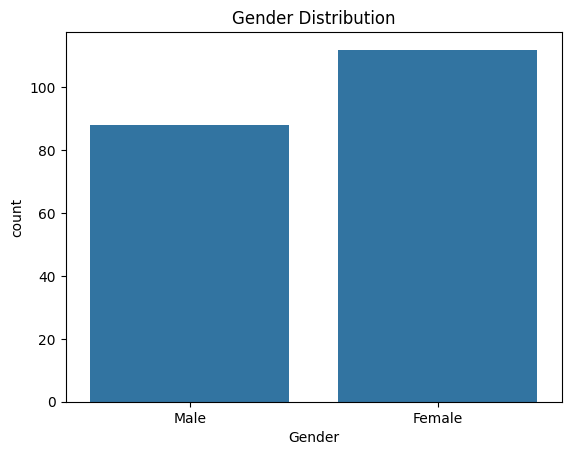

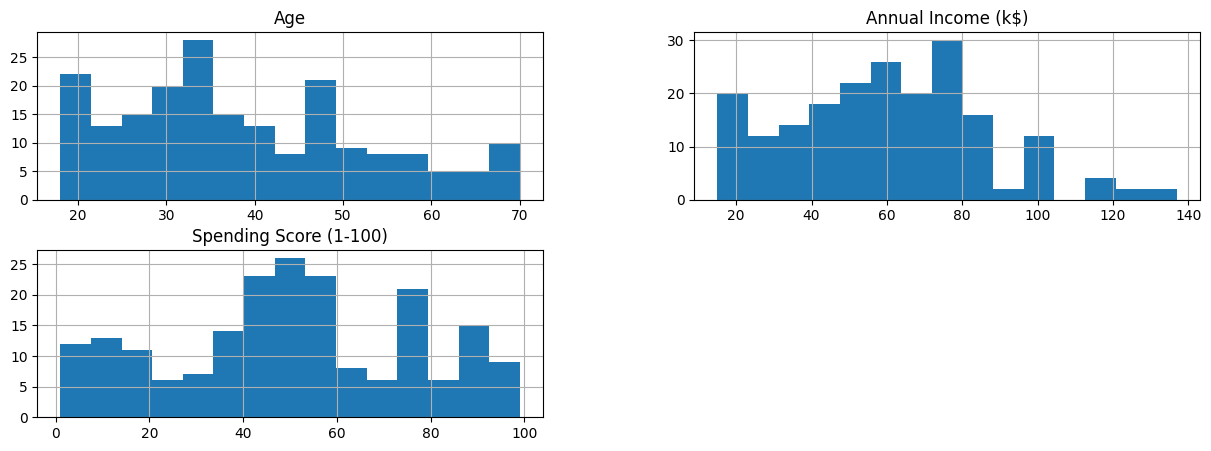

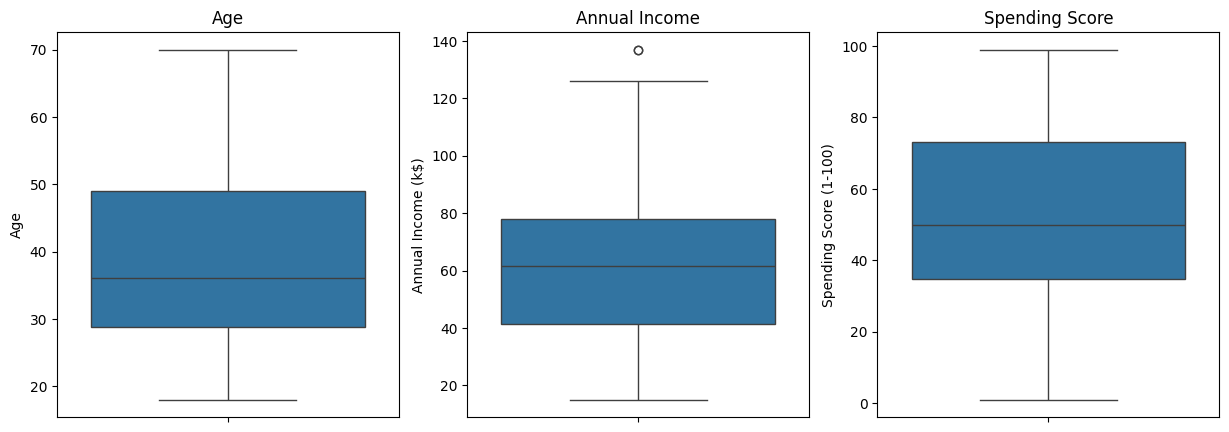

In [2]:
# Step 2
# Check the shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Data types
print("\nData types:\n", df.dtypes)

# Basic statistics for numeric columns
print("\nSummary statistics:\n", df.describe())

# Count of unique values in categorical columns
print("\nUnique values:\n", df.nunique())

# Distribution of Gender
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Histograms for Age, Annual Income, Spending Score
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=15, figsize=(15,5))
plt.show()

# Boxplot to check for outliers in numeric features
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y=df['Age'])
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Annual Income')

plt.subplot(1,3,3)
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Spending Score')
plt.show()


In [3]:
# Step 3
# Select numeric features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Check scaled features' first 5 rows
pd.DataFrame(X_scaled, columns=X.columns).head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


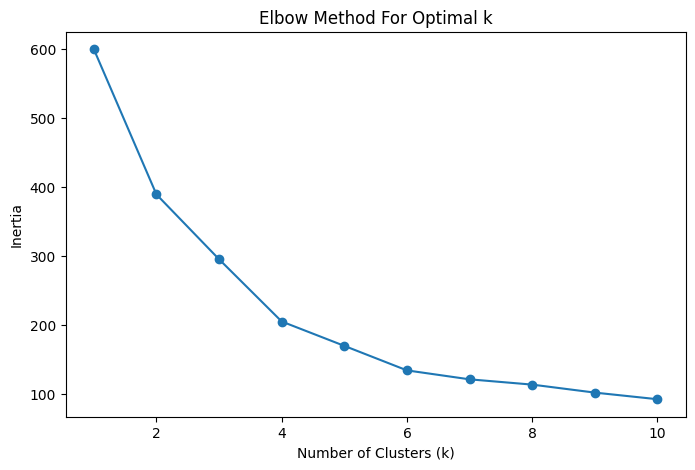

In [4]:
# Step 4
# Determine the optimal number of clusters using the Elbow Method
inertia = []

# Test cluster sizes from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
# Apply KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# Preview
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


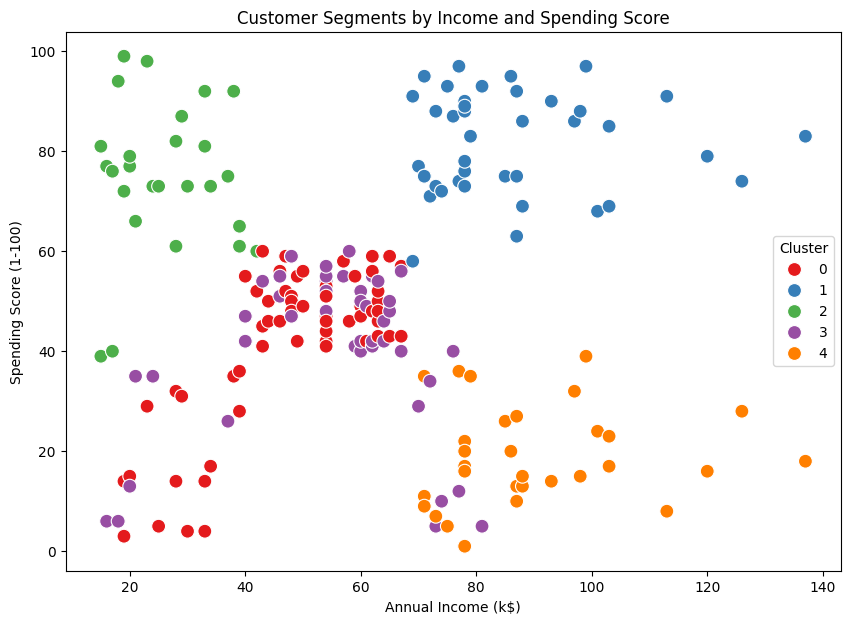

In [6]:
# Step 5
# Plot clusters by Annual Income and Spending Score
plt.figure(figsize=(10,7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', data=df, s=100)
plt.title('Customer Segments by Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

### Consulting Summary: Customer Segmentation Insights

Using K-Means clustering on mall customer data, we identified 5 unique customer segments based on income and spending behavior.

1. **Cluster 1 – High Value Customers:** High income and high spending. Should be prioritized with exclusive offers and loyalty rewards.
2. **Cluster 2 – Impulse Buyers:** Low income, but high spending. Responsive to discounts and emotional triggers.
3. **Cluster 0 – Average Customers:** Middle income and spending. Consistent base, but with growth potential through targeted promotions.
4. **Cluster 3 – Price-Sensitive Customers:** Low income and low spending. Require value-driven messaging and entry-level offerings.
5. **Cluster 4 – Under-engaged Wealthy Customers:** High income but low spending. Opportunity to activate through personalized engagement.

### Recommendations
- Launch tiered marketing campaigns tailored to each cluster.
- Reward high-spending segments, and nurture low-engaged segments with targeted incentives.
- Continuously monitor spending changes to move customers into higher-value clusters.